**H&M EDA**

In [ ]:
*************1-EDA -Data Preprocessing -Future engineering*********************

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.options.display.max_rows = 999

In [7]:
articles = pd.read_csv("C:/Users/Admin/Desktop/ecenur/data/articles.csv")
customers = pd.read_csv("C:/Users/Admin/Desktop/ecenur/data/customers.csv")
transactions = pd.read_csv("C:/Users/Admin/Desktop/ecenur/data/transactions_train.csv")


In [8]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe().T)
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [10]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)


In [11]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [12]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [ ]:
*******************

***articles***

article_id : A unique identifier of every article.
product_code, prod_name : A unique identifier of every product and its name (not the same).
product_type, product_type_name : The group of product_code and its name
graphical_appearance_no, graphical_appearance_name : The group of graphics and its name
colour_group_code, colour_group_name : The group of color and its name
perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : The added color info
department_no, department_name: : A unique identifier of every dep and its name
index_code, index_name: : A unique identifier of every index and its name
index_group_no, index_group_name: : A group of indeces and its name
section_no, section_name: : A unique identifier of every section and its name
garment_group_no, garment_group_name: : A unique identifier of every garment and its name
detail_desc: : Details

In [107]:
articles.head()

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [108]:
#We observe that features for which we expect to have the same number of unique value, like:
#product_type_no and product_type_name,
#departmant_no and department_name,
#section_no and section_name have different number of unique values, which might means that we might have categories with same name. Others, 
#  like: index_code and index_name,
#garment_group_no and garment_group_name have the same number of unique values.
unique_values(articles)

Total  Uniques
article_id                    105542   105542
product_code                  105542    47224
prod_name                     105542    45875
product_type_no               105542      132
product_type_name             105542      131
product_group_name            105542       19
graphical_appearance_no       105542       30
graphical_appearance_name     105542       30
colour_group_code             105542       50
colour_group_name             105542       50
perceived_colour_value_id     105542        8
perceived_colour_value_name   105542        8
perceived_colour_master_id    105542       20
perceived_colour_master_name  105542       20
department_no                 105542      299
department_name               105542      250
index_code                    105542       10
index_name                    105542       10
index_group_no                105542        5
index_group_name              105542        5
section_no                    105542       57
section_name                  105542       56
garment_group_no              105542       21
garment_group_name            105542       21
detail_desc                   105126    43404

In [110]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=18)

In [111]:
num_cols

['article_id', 'price']

In [ ]:
##unusable
correlation_matrix(articles,num_cols)

In [ ]:
check_df(articles,10)

In [109]:
missing_data(articles)

Total  Percent
detail_desc                     416   0.3942
perceived_colour_master_name      0   0.0000
garment_group_name                0   0.0000
garment_group_no                  0   0.0000
section_name                      0   0.0000
section_no                        0   0.0000
index_group_name                  0   0.0000
index_group_no                    0   0.0000
index_name                        0   0.0000
index_code                        0   0.0000
department_name                   0   0.0000
department_no                     0   0.0000
article_id                        0   0.0000
product_code                      0   0.0000
perceived_colour_value_name       0   0.0000
perceived_colour_value_id         0   0.0000
colour_group_name                 0   0.0000
colour_group_code                 0   0.0000
graphical_appearance_name         0   0.0000
graphical_appearance_no           0   0.0000
product_group_name                0   0.0000
product_type_name                 0   0.0000
product_type_no                   0   0.0000
prod_name                         0   0.0000
perceived_colour_master_id        0   0.0000

In [ ]:
#Bütün ürünler arsında kadın ürünleri en geniş kısmı ve spor ürünleri de en dar kısmı oluşturur

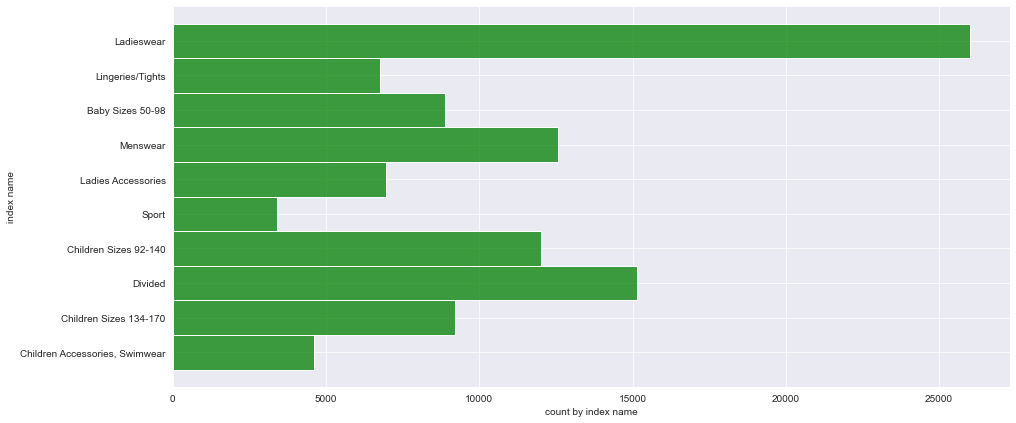

In [113]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='green')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

In [ ]:
#Kadın ve çoçuk indexleri alt index giyim gruplarına sahip
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

In [ ]:
#ürün bazında bakıldığından en çok çeşşit aksesurlarda görünüyor.her grubun kendi içinde en yüksek sayıda ürün türleri var
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

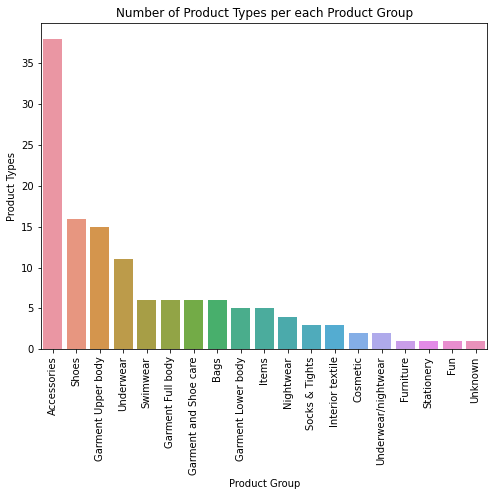

In [22]:
#Number of Articles per each Product Group
temp = articles.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [115]:
#Number of Articles per each Product Group
temp = articles.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

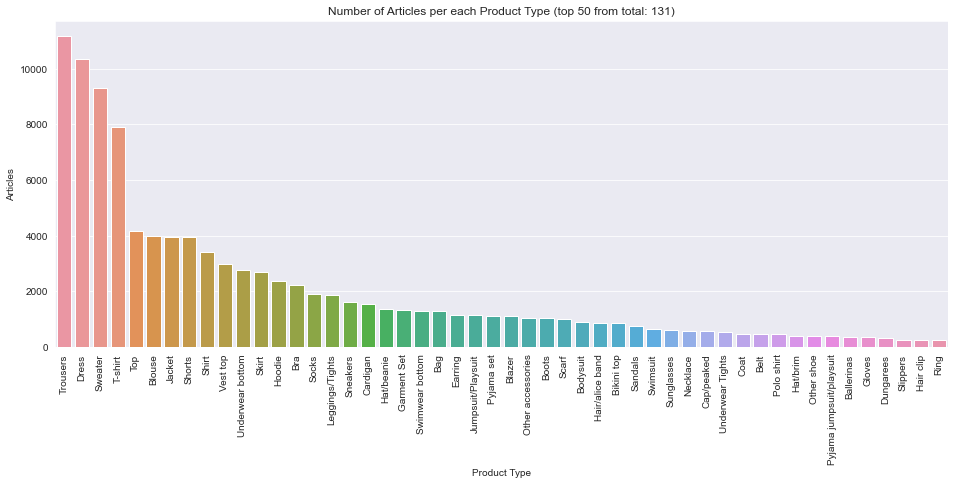

In [116]:
#Number of Articles per each Product Type (top 50 from total:
temp = articles.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

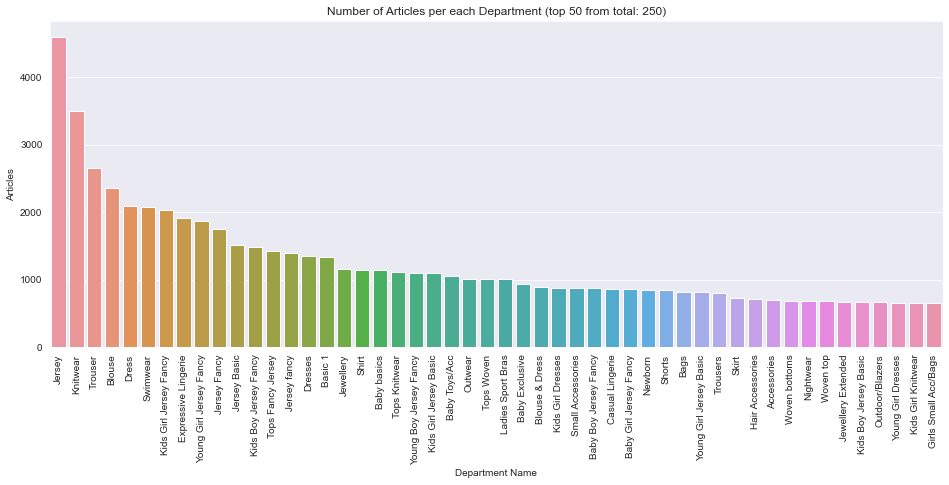

In [117]:
#Number of Articles per each Department (top 50 from total:
temp = articles.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department Name': temp.index,
                   'Articles': temp.values
                  })
total_depts = len(df['Department Name'].unique())
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Department (top 50 from total: {total_depts})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Department Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [ ]:
#Number of Articles per each Graphical Appearance Name
temp = articles.groupby(["graphical_appearance_name"])["article_id"].nunique()
df = pd.DataFrame({'Graphical Appearance Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Graphical Appearance Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Graphical Appearance Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

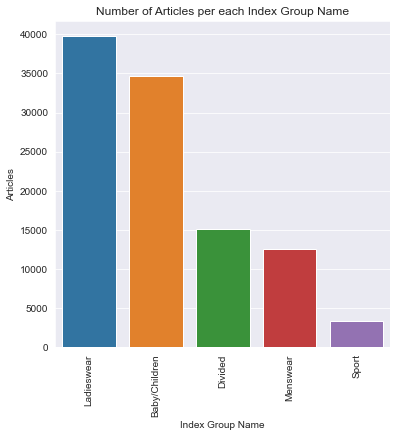

In [118]:
#Number of Articles per each Index Group Name
temp = articles.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Articles per each Index Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

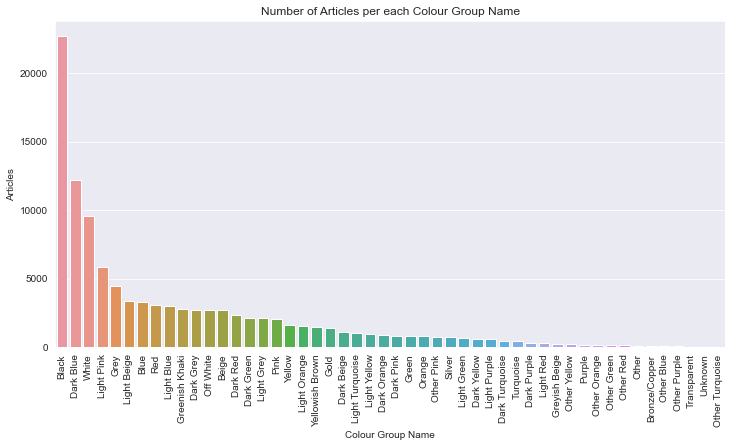

In [119]:
#Number of Articles per each Colour Group Name
temp = articles.groupby(["colour_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Colour Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Colour Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Colour Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

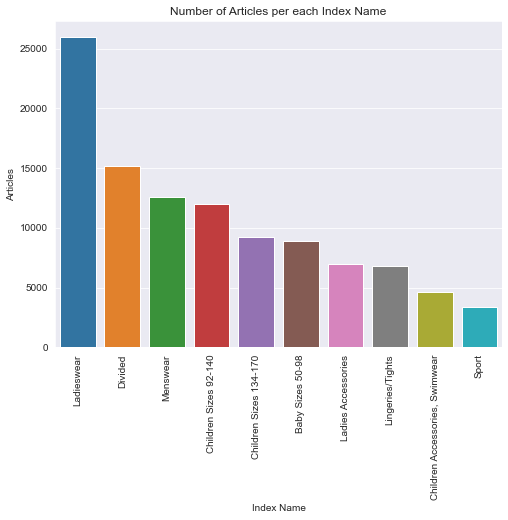

In [121]:
#Number of Articles per each Index Name
temp = articles.groupby(["index_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title(f'Number of Articles per each Index Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

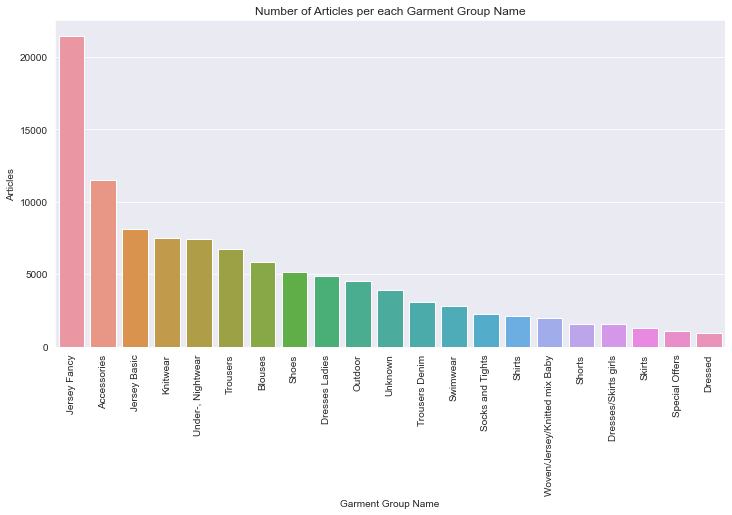

In [120]:
#Number of Articles per each Garment Group Name
temp = articles.groupby(["garment_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Garment Group Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (12,6))
plt.title(f'Number of Articles per each Garment Group Name')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Garment Group Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

***customer***


customer_id : A unique identifier of every customer
FN : 1 or missed
Active : 1 or missed
club_member_status : Status in club
fashion_news_frequency : How often H&M may send news to customer
age : The current age
postal_code : Postal code of customer

In [36]:
check_df(customers,10)

##################### Shape #####################
(1371980, 7)
##################### Types #####################
customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object
##################### Head #####################
                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
5  000064249685c11552da43ef22a5030f35a147f723d5b0...  NaN     NaN   
6  0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...  NaN     NaN   
7  00007d2de826758b65a93dd24ce629e

In [95]:
#Only customer id and postal code are completely filled.
#Age, fashion news frequency have arounfd 1% misssing data, FN has 65% missing and Active has 66% missing data.
missing_data(customers)

Total  Percent
fashion_news_frequency  16009   1.1669
age                     15861   1.1561
club_member_status       6062   0.4418
customer_id                 0   0.0000
FN                          0   0.0000
Active                      0   0.0000
postal_code                 0   0.0000

In [97]:
unique_values(customers)

Total  Uniques
customer_id             1371980  1371980
FN                      1371980        2
Active                  1371980        2
club_member_status      1365918        3
fashion_news_frequency  1355971        4
age                     1356119       84
postal_code             1371980   352899

In [75]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=2)

In [76]:
cat_cols

['Club Member Status']

In [77]:
num_cols

['Customers']

In [ ]:
correlation_matrix(customers,num_cols)

In [74]:
grab_col_names(customers)

(['club_member_status', 'fashion_news_frequency', 'FN', 'Active'],
 ['age'],
 ['customer_id', 'postal_code'])

In [ ]:
#analys col by col

In [34]:
#customer_id is unique
customers.shape[0] - customers['customer_id'].nunique()

0

In [43]:
#fn
customers['FN'].value_counts()


1.0    476930
Name: FN, dtype: int64

In [79]:
customers['FN'].unique()
customers['Active'].unique()

array([0., 1.])

In [45]:
print(customers['FN'].isnull().sum())

895050


ValueError: 'label' must be of length 'x'

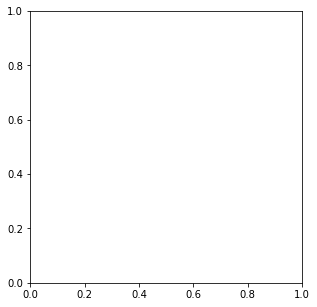

In [13]:
#fn /not fn
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(customers['FN'].value_counts(), explode=explode, labels=['Not-FN','FN'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show()

ValueError: 'label' must be of length 'x'

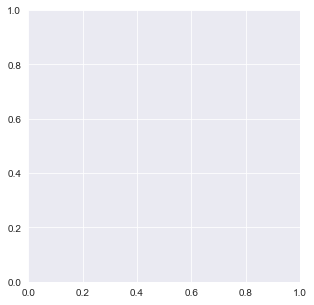

In [126]:
#active / not active
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.10)
colors = sns.color_palette('Paired')
ax.pie(customers['Active'].value_counts(), explode=explode, labels=['Not-active','Active'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show()

In [52]:
#replace NaN TO 0 for columns FN and Active  
customers[['FN','Active']] = customers[['FN','Active']].fillna(0)

In [ ]:
# All custmoers that are Active have also FN status. 
#But reverse is not true - not all users with FN status are active.
#If it's correct we would expect to see a percentage difference in order of 0.9%.

In [56]:
#Percentage of customers that have both FN and Active status: 33.85%
FN_Active = len(customers[(customers['FN']==1) & (customers['Active']==1)])/customers.shape[0]*100
print('Percentage of customers that have both FN and Active status: {}%'.format(round(FN_Active,2)))

Percentage of customers that have both FN and Active status: 33.85%


In [57]:
#Percentage of customers that have FN status but are not Active: 0.91%
FN_not_active = len(customers[(customers['FN']==1) & (customers['Active']!=1)])/customers.shape[0]*100
print('Percentage of customers that have FN status but are not Active: {}%'.format(round(FN_not_active,2)))

Percentage of customers that have FN status but are not Active: 0.91%


In [31]:

customers.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

In [67]:
customers[['customer_id', 'club_member_status']].groupby('club_member_status').count()

customer_id
club_member_status             
ACTIVE                  1272491
LEFT CLUB                   467
PRE-CREATE                92960

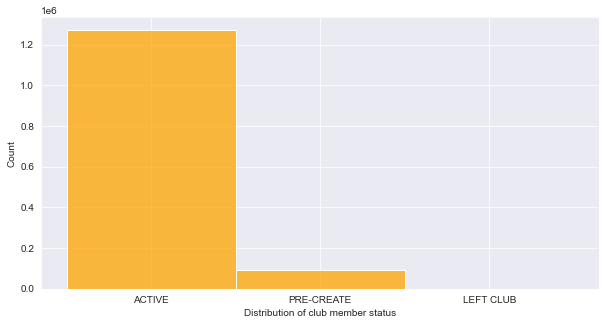

In [59]:
#müşterilerin üyük bir kısmınnın H&M club active 
#az bir kısım pre-   aktifleştirmeye başlama aşamasında
#küçük bir kısım da kulüp üyeliğini terk etmiş
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

In [61]:
#müşterilerin büyük kısmı news almamayı tercih ediyor
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

In [62]:
pie_data

customer_id
fashion_news_frequency             
Monthly                         842
NONE                         877711
None                              2
Regularly                    477416

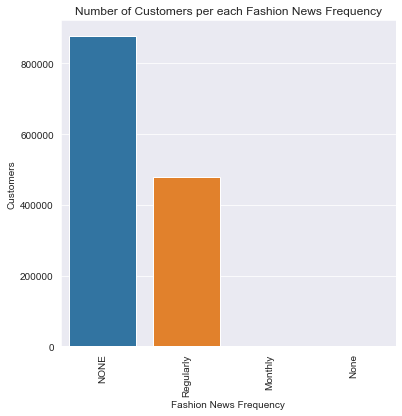

In [65]:
#???monthly gösterilmemiş 
temp = customers.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'Fashion News Frequency': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Fashion News Frequency')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Fashion News Frequency', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [ ]:
#müşteri yaş gruplarına göre incele
#21-27 arası en yüksek müşteri oranı
#Distribution of the customers age
#The distribution shows that there are two main age-groups of customers: 
#     around 20-30 years old and 45-55 years old.

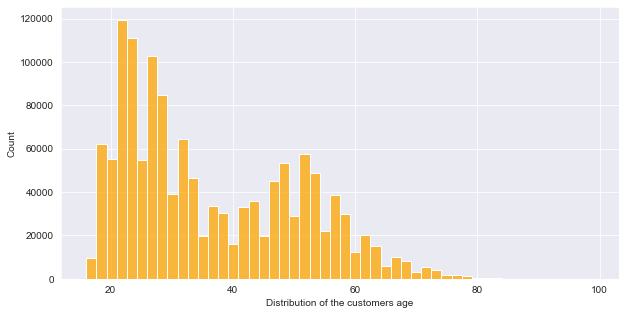

In [72]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

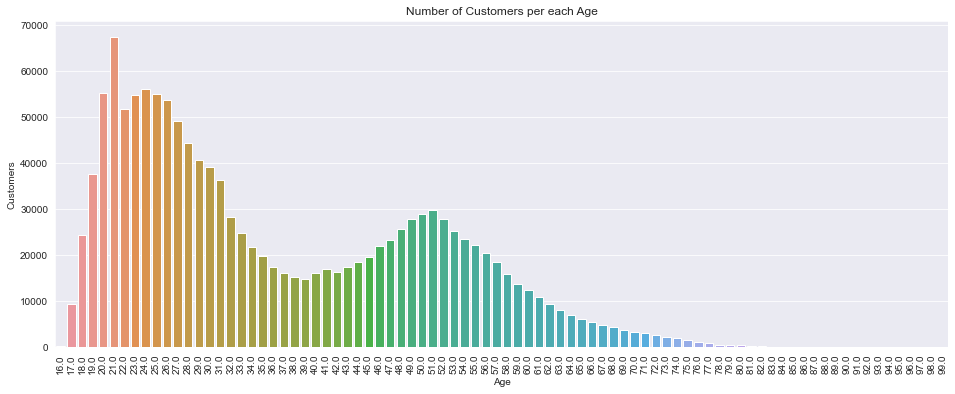

In [63]:
temp = customers.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [ ]:
#postal_code **!!!!** sayıları incelemeiştik
#posta kodu ortak dağıtım noktası gibi olabilir
#bir kaç posta kodunun dikkat çekici sayıda sonucu geliyor sonlara doğru 1 olanlar da var
#adres bilgisi olarak kabul etmk doğru değil
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head(50)

In [ ]:
#en çok gelen posta kodu için diğer kolon değerlerini inclee
customers[customers['postal_code']=='2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

***Transactions***

In [ ]:
t_dat : A unique identifier of every customer
customer_id : A unique identifier of every customer (in customers table)
article_id : A unique identifier of every article (in articles table)
price : Price of purchase
sales_channel_id : 1 or 2

In [ ]:
*Transactions have customer_id and article_id, which are foreign keys for the customer and articles tables.
Beside this, transaction also contains sales_channel_id.
Transaction train data has entries for the date of the transaction, 
            the customer id, the article id, a price (per transaction) and a sales channel id.

In [85]:
transactions.head()

t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

In [87]:
check_df(transactions,10)

##################### Shape #####################
(31788324, 5)
##################### Types #####################
t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object
##################### Head #####################
        t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   
5  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687001   
6  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221001   
7  2018-09-20  00083cda041544b2fbb0e0d2905a

In [90]:
grab_col_names(transactions)


(['sales_channel_id'], ['article_id', 'price'], ['t_dat', 'customer_id'])

In [ ]:
#No missing data from transactions train data source.
missing_data(transactions)

In [ ]:
unique_values(transactions)

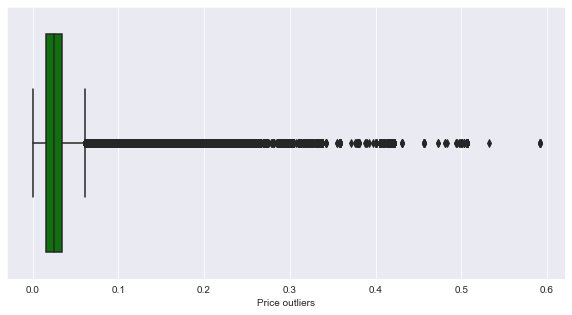

In [89]:
#Price outliers
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price', color='green')
ax.set_xlabel('Price outliers')
plt.show()

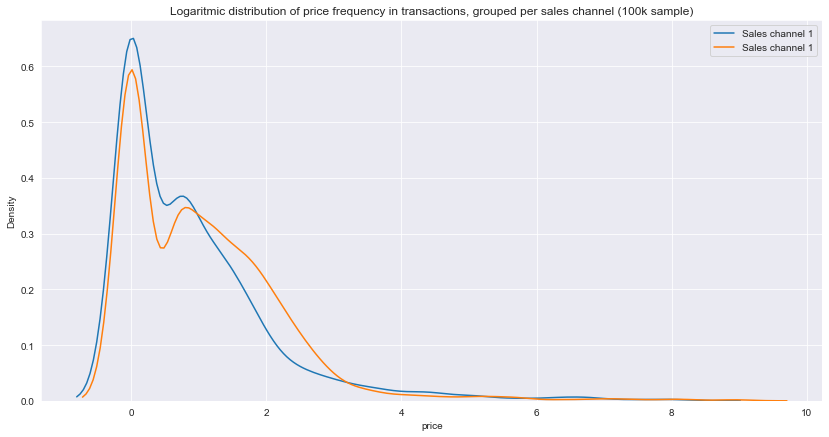

In [93]:
#Logaritmic distribution of price frequency in transactions, grouped per sales channel (100k sample)
df = transactions.sample(100_000)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==1].price.value_counts()))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==2].price.value_counts()))
ax.legend(labels=['Sales channel 1', 'Sales channel 1'])
plt.title("Logaritmic distribution of price frequency in transactions, grouped per sales channel (100k sample)")
plt.show()

In [ ]:
However, comparing prices inside groups is more accurate, because accessories and trousers prices may vary largerly.
Get subset from articles and merge it to transactions.

In [ ]:
#We observe that not all the customers in customer data appears as having transactions in transaction train data.
#As well, not all articles are represented in this data. It is interesting that the number of different prices is quite small,
 #           out of 31.7M transactions, and for 1.3M customers, buying 104K different articles. 
#Same for the dates, there are only 734 different dates. Let's check some stats here.

In [98]:
print(f"Percent of articles present in transactions: {round(104547/105542,3)*100}%")
print(f"Percent of customers present in transactions: {round(1362281/1371980,3)*100}%")

Percent of articles present in transactions: 99.1%
Percent of customers present in transactions: 99.3%


In [ ]:
********************************************************************

**#Top 10 customers by num of transactions.

In [ ]:
transactions_byid = transactions.groupby('customer_id').count()

In [ ]:
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]